<a href="https://colab.research.google.com/github/jordanbell2357/uscg-nais-data/blob/main/BigQuery/BigQuery_bquxjob_6bca6f75_1886d9e9255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ais-data-385301' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ais-data-385301:US:bquxjob_6bca6f75_1886d9e9255)
back to BigQuery to edit the query within the BigQuery user interface.

In [10]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_6bca6f75_1886d9e9255') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT MMSI, COUNTIF(Status IS NOT NULL) AS Status_NOT_NULL_count, COUNTIF(Status IS NULL) AS Status_IS_NULL_count FROM `ais-data-385301.uscg.nais` GROUP BY MMSI;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [11]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_6bca6f75_1886d9e9255') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,MMSI,Status_NOT_NULL_count,Status_IS_NULL_count
0,316237000,10503,0
1,338118674,42204,0
2,367044310,16848,0
3,367182110,31883,0
4,316003331,50932,0
...,...,...,...
54394,970179451,1,0
54395,368081163,1,0
54396,345110024,1,0
54397,635616816,1,0


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [12]:
results.describe()

,Status_NOT_NULL_count,Status_IS_NULL_count
count,54399.0,54399.0
mean,6361.743709,2713.869115
std,14960.775985,5473.271721
min,0.0,0.0
25%,0.0,0.0
50%,0.0,201.0
75%,3089.0,2124.0
max,75551.0,42962.0


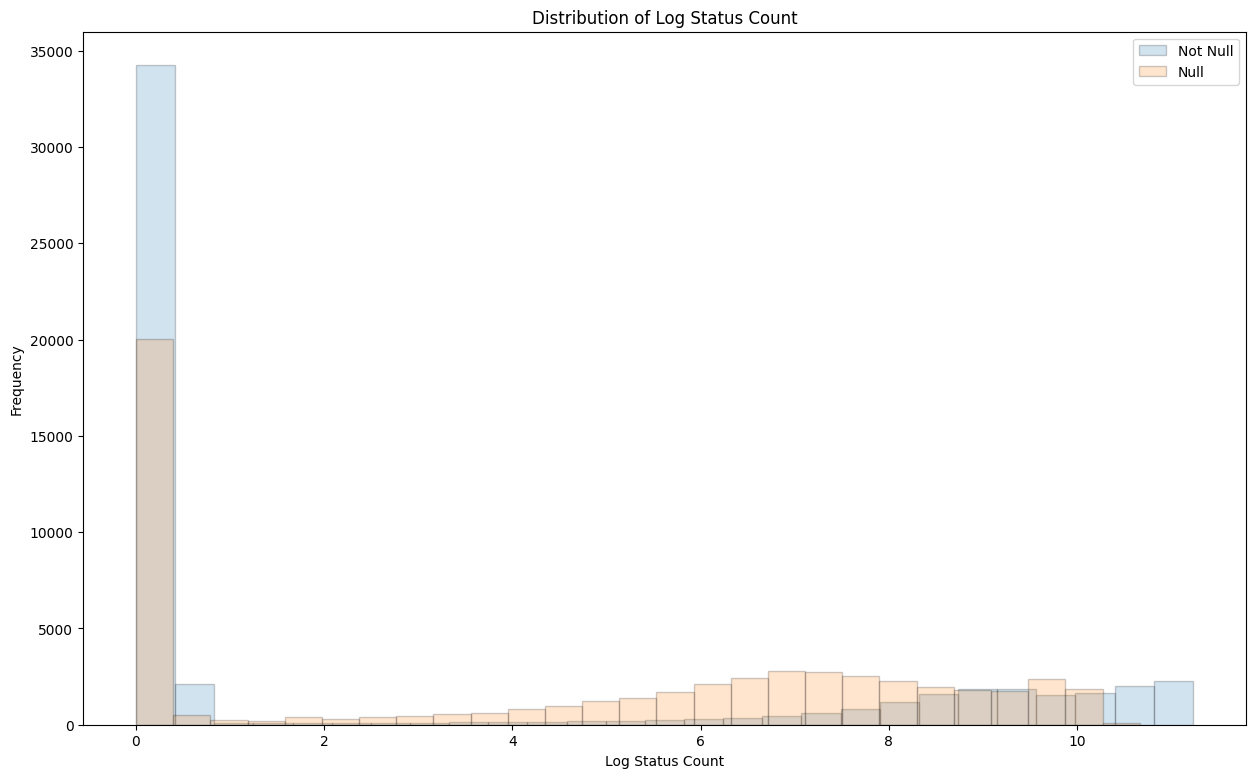

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Status_NOT_NULL_count' and 'Status_IS_NULL_count' to 1-dimensional numpy arrays
not_null_count = np.array(results['Status_NOT_NULL_count']+1, dtype=float)
is_null_count = np.array(results['Status_IS_NULL_count']+1, dtype=float)

# Apply log transform
log_not_null_count = np.log(not_null_count)
log_is_null_count = np.log(is_null_count)

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a histogram for not null values
plt.hist(log_not_null_count, bins='auto', edgecolor='black', alpha=0.2, label='Not Null')

# Create a histogram for null values
plt.hist(log_is_null_count, bins='auto', edgecolor='black', alpha=0.2, label='Null')

plt.xlabel("Log Status Count")
plt.ylabel("Frequency")
plt.title("Distribution of Log Status Count")
plt.legend()

plt.show()